In [24]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

In [26]:
category_names = newsgroups_data.target_names


In [27]:
df = pd.DataFrame({'document': newsgroups_data.data, 'category': newsgroups_data.target})

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df['document'], df['category'], test_size=0.2, random_state=42)

In [29]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [30]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(X_test_vectorized)


In [31]:
accuracy = metrics.accuracy_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions, average='weighted')
recall = metrics.recall_score(y_test, predictions, average='weighted')
f1_score = metrics.f1_score(y_test, predictions, average='weighted')


In [32]:
print("Document Classification Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Document Classification Metrics:
Accuracy: 0.6175066312997347
Precision: 0.6960434766081827
Recall: 0.6175066312997347
F1 Score: 0.6039448006518702


In [33]:
metrics_dict = { "Accuracy": accuracy, "Precision": precision, "Recall": recall,
"F1 Score": f1_score
}


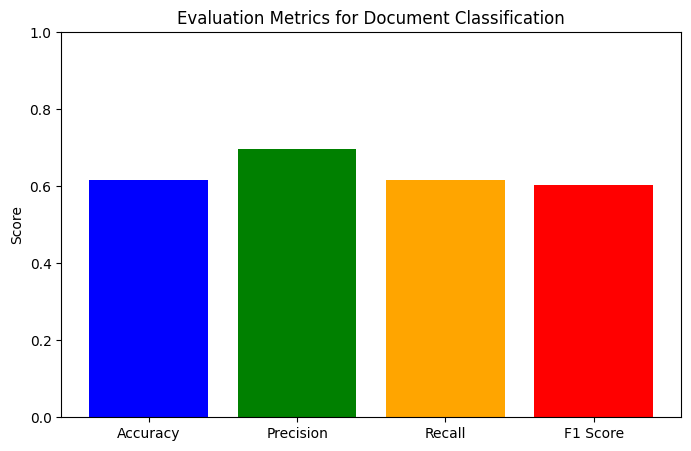

In [34]:
plt.figure(figsize=(8, 5))
plt.bar(metrics_dict.keys(), metrics_dict.values(), color=['blue', 'green', 'orange', 'red'])
plt.title('Evaluation Metrics for Document Classification')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()


In [37]:
print("\nSample Predictions:")
for i, (doc, pred_label, actual_label) in enumerate(zip(X_test[:5], predictions[:5], y_test[:5])): print(f"Document {i + 1}: {doc[:200]}...")
print(f"Predicted Category: {category_names[pred_label]}")
print(f"Actual Category: {category_names[actual_label]}")
print("---")



Sample Predictions:
Document 1: 


	The runner can leave his base at any time.  If the ball is caught,
he's got to tag up.  If it isn't caught, he _doesn't_ have to tag up at
all.  So, if he's feeling lucky, your runner at second ca...
Document 2: 
Well, it's not an FTP site, but I got an 800 number for Signetics BBS.

The Signetics BBS contain some pretty good items for the 8051.  I am
currently using the following files which I downloaded fro...
Document 3: Hi,
    I was reading through "The Spaceflight Handbook" and somewhere in
there the author discusses solar sails and the forces acting on them
when and if they try to gain an initial acceleration by p...
Document 4: I was a graduate student in the early 1980s, and we had a conference on 
Reaganomics where Jerry Jordan, then a member of the Council of Economic 
Advisors, was a speaker.  I had the pleasure of drivi...
Document 5: FREE-ENERGY TECHNOLOGY
                       by Robert E. McElwaine, Physicist
          
            

In [38]:
print("\nCategory Names:")
for i, name in enumerate(category_names): print(f"{i}: {name}")



Category Names:
0: alt.atheism
1: comp.graphics
2: comp.os.ms-windows.misc
3: comp.sys.ibm.pc.hardware
4: comp.sys.mac.hardware
5: comp.windows.x
6: misc.forsale
7: rec.autos
8: rec.motorcycles
9: rec.sport.baseball
10: rec.sport.hockey
11: sci.crypt
12: sci.electronics
13: sci.med
14: sci.space
15: soc.religion.christian
16: talk.politics.guns
17: talk.politics.mideast
18: talk.politics.misc
19: talk.religion.misc


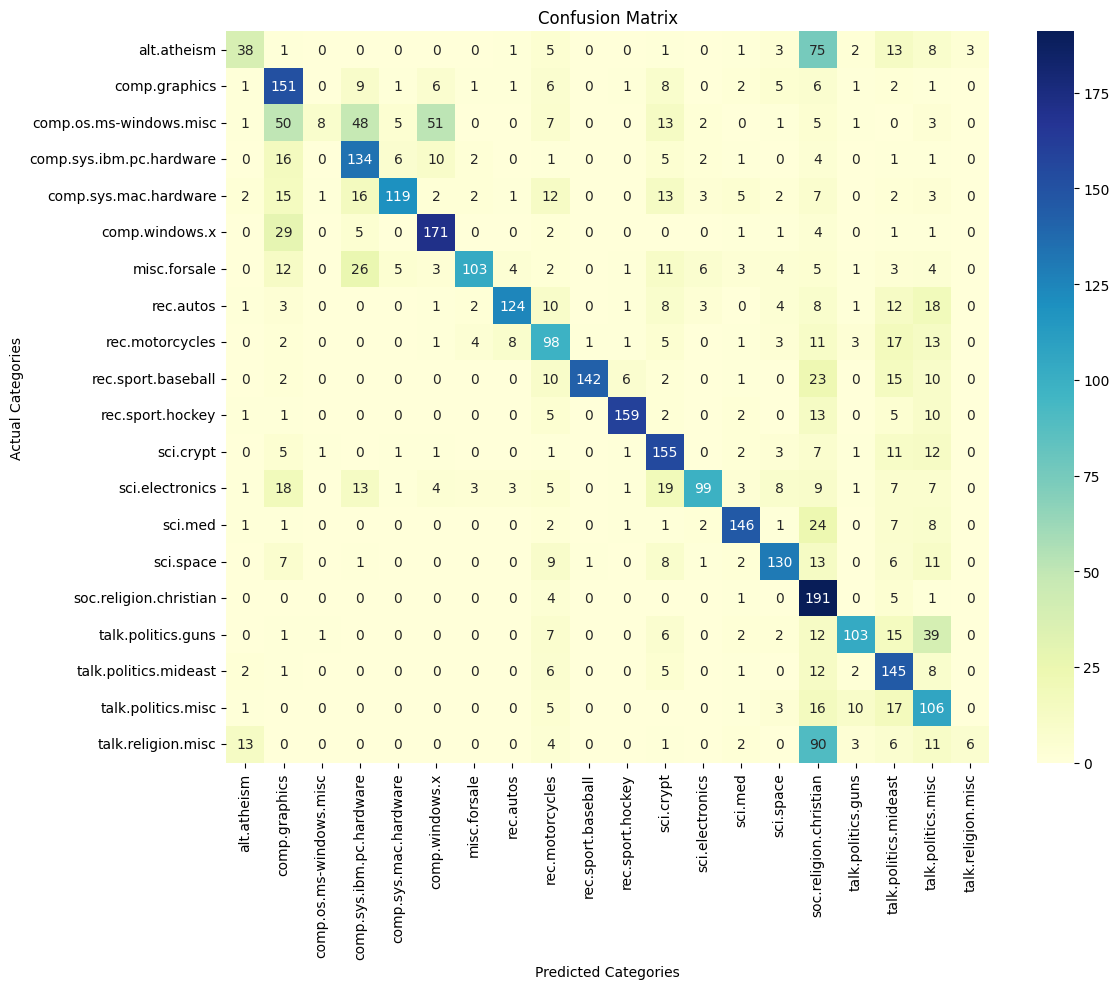

In [40]:
conf_matrix = metrics.confusion_matrix(y_test, predictions)


plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=category_names,
            yticklabels=category_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Categories")
plt.ylabel("Actual Categories")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

